## <center> Neural Networks in scikit-learn </center>

#### Linear models:

<center> ŷ = w[0] \* x[0] + w[1] \* x[1] + ... + w[p] \* x[p] + b </center>

Multilayer Perceptron Models (MLPs) are the most basic models of feed-forward neural networks, meaning that the flow of information goes only in only one direction unlike methods that include back propagation or other non unidirectional implementations of deep neural network.
MLPs can be viewed as generalizations of linear models that go through multiple stages of processing to reach a decision or a prediction.

We've seen that prediction is based on the weighted sum of features : x[0], x[1] and so on multiplied by the coefficients w[0], w[1] and so on ...

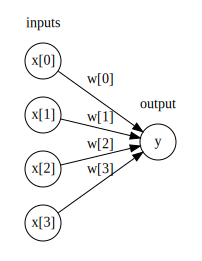

In [1]:
# Let's use mglearn library to visualize it better.
import mglearn

 # This is how Logistic Regression works :
mglearn.plots.plot_logistic_regression_graph()

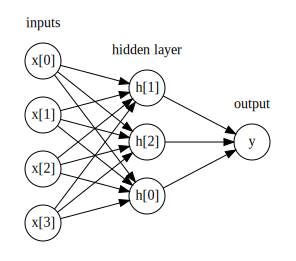

In [2]:
# With MLPs, weights are calculated multiple times.
# An MLP with a single hidden layer is called a simple neural network.

mglearn.plots.plot_single_hidden_layer_graph()

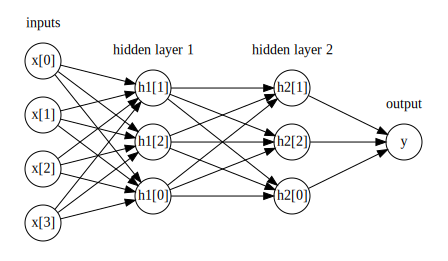

In [3]:
mglearn.plots.plot_two_hidden_layer_graph()

What differentiates neural networks from linear models is that once we computed a weight or a weighted sum for a hidden unit we are going to additionaly apply a nonlinear funtion to the result.
Two of the most applied functions are RELU and TANH.

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Building the classifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy on the training subset: 0.939
Accuracy on the test subset: 0.916


Accuracy on both training and test subsets seems to be not so good compared to the rest of algorithms.
This may be due to the scaling of the data, the fact that the features of each cancer sample are not at the same scale.
Let's try to fix this and see if it improves the performance of the algorithm.

In [5]:
# First, let's examine the maximum values of each feature.
print('The maximum per each feature:')

feature_scales = []
for index in range(0, cancer.feature_names.size):
    feature_scales.append((cancer.feature_names.item(index), cancer.data.max(axis=0).item(index)))

print(feature_scales)

The maximum per each feature:
[('mean radius', 28.11), ('mean texture', 39.28), ('mean perimeter', 188.5), ('mean area', 2501.0), ('mean smoothness', 0.1634), ('mean compactness', 0.3454), ('mean concavity', 0.4268), ('mean concave points', 0.2012), ('mean symmetry', 0.304), ('mean fractal dimension', 0.09744), ('radius error', 2.873), ('texture error', 4.885), ('perimeter error', 21.98), ('area error', 542.2), ('smoothness error', 0.03113), ('compactness error', 0.1354), ('concavity error', 0.396), ('concave points error', 0.05279), ('symmetry error', 0.07895), ('fractal dimension error', 0.02984), ('worst radius', 36.04), ('worst texture', 49.54), ('worst perimeter', 251.2), ('worst area', 4254.0), ('worst smoothness', 0.2226), ('worst compactness', 1.058), ('worst concavity', 1.252), ('worst concave points', 0.291), ('worst symmetry', 0.6638), ('worst fractal dimension', 0.2075)]


Many of the features are at different scales or wothin different value ranges.
Let's try bring them at the same scale to improve the performance ot the algorithm.<br/>
Features should have zero mean and a unit variance (this method is widely used for normalization in many machine learning algorithms) or a mean that is equal to zero and the variance that is equal to 1.

https://en.wikipedia.org/wiki/Feature_scaling

For this we will use the standard scaler class of scikit learn.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

# Default max_iter to 200 is not enough to reach convergence.
# Remember that we use random state for reproducibility of the results.
mlp = MLPClassifier(max_iter=1000, random_state=42)   

mlp.fit(X_train_scaled, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.958


After scaling the cancer dataset and retraining the neural network our performance is better but there is still a gap between training and test subsets.
There are a lot of parameters that we can change, the solver, the number of hidden layers, the activation function, etc...
<br/><br/>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

OR type mlp then shift + Tab then click on + to see all the documentation.

In [7]:
# We increase the alpha, which is regularization term parameter, to 1.
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset: 0.986
Accuracy on the test subset: 0.972


We want to inspect the weights of our model, specifically the weights learned between the input and the hidden layer.

In [13]:
mlp.coefs_[0]

array([[ 4.34870465e-02, -4.66972177e-03,  1.55700597e-03, ...,
        -2.04013404e-02, -5.56353335e-03, -2.95819847e-03],
       [ 1.71719649e-02, -3.38603611e-02, -9.17061440e-02, ...,
        -4.46802696e-04,  3.72364969e-02, -1.95452003e-05],
       [ 5.12222410e-02, -4.35930057e-02, -2.53979006e-02, ...,
        -2.91225379e-02,  1.71897443e-02, -4.07238579e-03],
       ...,
       [ 7.37509360e-02, -1.37866339e-02, -5.22148395e-02, ...,
        -3.53054733e-02,  9.67300713e-02, -5.85505274e-04],
       [ 1.02344445e-01, -6.28882375e-03,  1.29689275e-02, ...,
        -3.88434513e-02,  6.10204335e-02, -6.23226637e-03],
       [-1.65368482e-02, -1.63071099e-02, -7.35968381e-02, ...,
        -4.20773386e-02,  5.60164840e-02,  1.33142239e-03]])

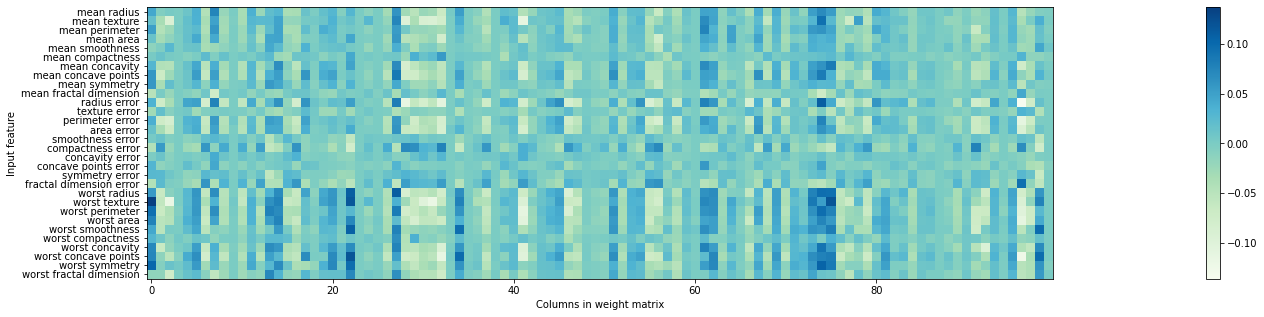

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,5))
# mlp.coefs_[0] : coefficient for the MLP first layer
# cmap='GnBu' : color map green/blue
plt.imshow(mlp.coefs_[0], interpolation='None', cmap='GnBu')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

Features with very small weights accross the hidden units may be less important, so between smoothness eroor and fractal dimension seem like they don't play such an important role in the decision making.
Maybe we should try to explain this with a less comlex dataset.

### <center> Advantages and Disadvantages of Neural Nets (scikit-learn) </center>

### Stronger points:
 - Can be used efficiently on large datasets.
 - Can build very complex models.
 - Many parameters for tuning.
 - Flexibility and rapid prototyping.
 - etc...
 
### Weaker points:
 - Many parameters for tuning.
 - Some solvers are scale sensitive.
 - Data may need to be pre-processed (with scaling for example).
 - etc...
 
 
### Alternatives:
 
 - Theano.
 - Tensorflow.
 - Keras.
 - Lasagna.
 - etc...